In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l1
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import keras
df = pd.read_csv("output_28.csv")
ds = df.values
X = ds[:,0:5]
Y = ds[:,5]
y = np.array(Y)
y = y.reshape(-1,1);
scaler = StandardScaler()
fity =  scaler.fit_transform(x)
X = np.preprocessing.scale(X_train)
X_train, X_test, y_train, y_test = train_test_split(X,fity,test_size = 0.2,random_state = 42)
k = 8
kf = KFold(n_splits = k, shuffle = True, random_state = 42)
def create_model():
    model = Sequential()
    model.add(Dense(100, input_dim = 5, activation = "relu", activity_regularizer = l1(0.01)))
    model.add(Dense(1, activation = "linear"))
    model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mean_absolute_error"])
    return model

mae_per_fold = []
for fold,(train_index,val_index) in enumerate(kf.split(X_train)):
    print(fold+1)
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index],y_train[val_index]

    model = create_model()

    model.fit(X_train,y_train, epochs = 30, batch_size = 5, verbose = 0)

    predictions = np.argmax(model.predict(X_val_fold),axis = 1)
    mae = mean_absolute_error(y_val_fold,predictions)

    mae_per_fold.append(mae)
    print(mae)
    
avg_mae = np.mean(mae_per_fold)
print(avg_mae)

AttributeError: module 'numpy' has no attribute 'preprocessing'

C:\Users\TARAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 199.1737 - mean_absolute_error: 12.5458 - val_loss: 164.3709 - val_mean_absolute_error: 10.1654
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 166.7731 - mean_absolute_error: 10.4514 - val_loss: 164.3228 - val_mean_absolute_error: 10.1326
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 161.7509 - mean_absolute_error: 10.4093 - val_loss: 159.6208 - val_mean_absolute_error: 9.9964
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 156.6209 - mean_absolute_error: 10.5131 - val_loss: 157.8919 - val_mean_absolute_error: 9.9914
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 172.5409 - mean_absolute_error: 11.1363 - val_loss: 155.7542 - val_mean_absolute_error: 9.8737
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 160.7778 - mean_absolute_error: 10.6372 - val_loss: 152.9708 - val_mean_absolute_error: 9.7714
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 155.1062 - mean

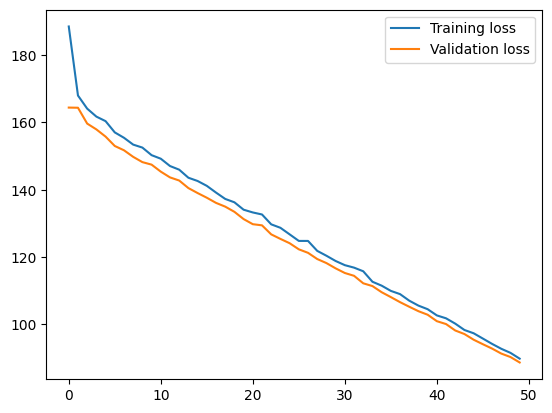

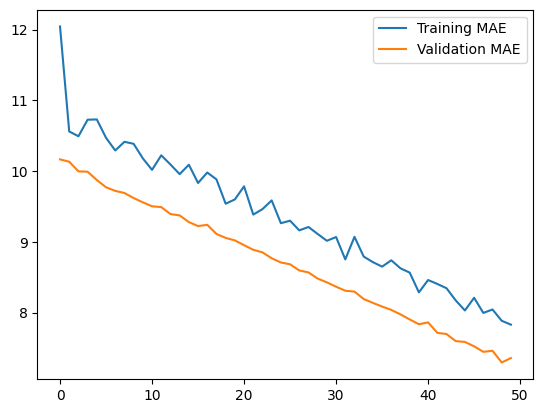

In [36]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l1
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import keras
df = pd.read_csv("output_28.csv")
ds = df.values
X = ds[:,0:5]
Y = ds[:,5]
y = np.array(Y)
y = y.reshape(-1,1);
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.1, random_state = 42)
model = Sequential()
model.add(Dense(80, input_dim = 5, activation = "relu"))
model.add(Dense(30, activation = "relu"))
model.add(Dense(1, activation = "linear"))
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = "mean_squared_error", optimizer = optimizer, metrics = ["mean_absolute_error"])
history = model.fit(X_train,y_train, epochs = 50, batch_size = 32, validation_data = (X_val, y_val))
predictions = model.predict(X_test)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label = "Validation loss")
plt.legend()
plt.show()
plt.plot(mae, label = "Training MAE")
plt.plot(val_mae, label = "Validation MAE")
plt.legend()
plt.show()

In [15]:

#print("Predicted values:")
#print(scaler.inverse_transform(predictions).reshape(1,-1))
#print("Test values:")
#print(scaler.inverse_transform(y_test).reshape(1,-1))

In [16]:
"""from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("output_13.csv")
ds = df.values
X = ds[:,0:4]
Y = ds[:,4]
y = np.array(Y)
y = y.reshape(-1,1)
scaler = StandardScaler()
scaler.fit(X);
fitx = scaler.transform(X);
fity =  scaler.fit_transform(y)
print(scaler.inverse_transform(fitx))"""

'from keras.models import Sequential\nfrom keras.layers import Dense\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nimport matplotlib.pyplot as plt\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\ndf = pd.read_csv("output_13.csv")\nds = df.values\nX = ds[:,0:4]\nY = ds[:,4]\ny = np.array(Y)\ny = y.reshape(-1,1)\nscaler = StandardScaler()\nscaler.fit(X);\nfitx = scaler.transform(X);\nfity =  scaler.fit_transform(y)\nprint(scaler.inverse_transform(fitx))'

In [17]:
"""from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("output_16.csv")
ds = df.values
X = ds[:,0:5]
Y = ds[:,5]
print(X)
print(Y)"""

'from keras.models import Sequential\nfrom keras.layers import Dense\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nimport matplotlib.pyplot as plt\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\ndf = pd.read_csv("output_16.csv")\nds = df.values\nX = ds[:,0:5]\nY = ds[:,5]\nprint(X)\nprint(Y)'

In [20]:
"""from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l1
df = pd.read_csv("output1.csv")
ds = df.values
X = ds[:,0:3]
Y = ds[:,3:6]
scaler = StandardScaler()
fity =  scaler.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X,fity,test_size = 0.05,random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.05, random_state = 42)
model = Sequential()
model.add(Dense(20, input_dim = 3, activation = "relu", activity_regularizer = l1(0.01)))
model.add(Dense(3, activation = "linear"))
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mean_absolute_error", "mean_squared_error"])
history = model.fit(X_train,y_train, epochs = 30, batch_size = 1, validation_data = (X_val, y_val))
predictions = model.predict(X_test)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label = "Validation loss")
plt.legend()
plt.show()
plt.plot(mae, label = "Training MAE")
plt.plot(val_mae, label = "Validation MAE")
plt.legend()
plt.show()"""

'from keras.models import Sequential\nfrom keras.layers import Dense\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nimport matplotlib.pyplot as plt\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\nfrom keras.regularizers import l1\ndf = pd.read_csv("output1.csv")\nds = df.values\nX = ds[:,0:3]\nY = ds[:,3:6]\nscaler = StandardScaler()\nfity =  scaler.fit_transform(Y)\nX_train, X_test, y_train, y_test = train_test_split(X,fity,test_size = 0.05,random_state = 42)\nX_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.05, random_state = 42)\nmodel = Sequential()\nmodel.add(Dense(20, input_dim = 3, activation = "relu", activity_regularizer = l1(0.01)))\nmodel.add(Dense(3, activation = "linear"))\nmodel.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mean_absolute_error", "mean_squared_error"])\nhistory = model.fit(X_train,y_train, epochs = 30, batch_size = 1, validation_data = (X_val, y_val))\

In [22]:
"""from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l1
df = pd.read_csv("output1.csv")
ds = df.values
X = ds[:,0:3]
Y = ds[:,4]
print(X)"""

'from keras.models import Sequential\nfrom keras.layers import Dense\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nimport matplotlib.pyplot as plt\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\nfrom keras.regularizers import l1\ndf = pd.read_csv("output1.csv")\nds = df.values\nX = ds[:,0:3]\nY = ds[:,4]\nprint(X)'

In [35]:
print("Predicted values:")
print(predictions.reshape(1,-1))
print("Test values:")
print(y_test.reshape(1,-1))

Predicted values:
[[ 9.543081   4.0264125  9.792574   5.737558   4.786329  10.177591
   9.850218   5.2098494  3.8660705 11.26252    1.8743011  6.4259934
  10.409271   4.316063   9.734929  10.061934  12.140354   2.6154132
   8.685234  10.447937  12.04261   12.0621605  8.006627   9.447334
   4.1225095 11.476667  12.179495   6.732649   4.719641   9.027241
  11.74963    9.065341  11.068134   6.0523925  1.6351056  9.008195
  10.467268   3.9302971  6.696391   3.7021616  9.984901   4.531093
  11.944898   6.265122   2.7182968  4.1488204  1.575975   1.945126
  10.58334    2.333926   3.994375   6.211739   5.327179  10.486599
   6.4080644  3.4398148  5.6166625  2.192925   6.605956   4.1727147
  12.120813   7.6704707  8.818041  11.905821   4.1966057  2.9115703
  11.281983   3.142682   7.226168  10.119747   9.370777   9.160662
   7.9504356  8.194332   8.70419    8.458185   7.78226    3.898259
  11.359825  11.554605   5.720223   4.2682805 11.788668   6.0347633
   8.780071   4.459415   6.17623   10.5

In [23]:
"""from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l1
df = pd.read_csv("data1.csv")
ds = df.values
X = ds[:,0:5]
Y = ds[:,5]
print(Y)"""

'from keras.models import Sequential\nfrom keras.layers import Dense\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nimport matplotlib.pyplot as plt\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\nfrom keras.regularizers import l1\ndf = pd.read_csv("data1.csv")\nds = df.values\nX = ds[:,0:5]\nY = ds[:,5]\nprint(Y)'

In [24]:
#print(predictions)

In [25]:
"""p = model.predict(X_val_fold);
print(scaler.inverse_transform(p).reshape(1,-1))
print(scaler.inverse_transform(y_val_fold).reshape(1,-1))"""

'p = model.predict(X_val_fold);\nprint(scaler.inverse_transform(p).reshape(1,-1))\nprint(scaler.inverse_transform(y_val_fold).reshape(1,-1))'